#### Here in this ipynb file we will find various probability of the the Dataframe on different queries 

### ***All are realated to the Discrete values***

***Importing the file for the analysis***

In [6]:
# Importing teh lib.
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Import the file csv to get the columns Data 
df=pd.read_csv('C:/Users/5530/OneDrive/Desktop/Mall_Customer_Segmentation/Data_files/customer_arrivals_removed_outliers_.csv')

This line calculates the Probability Mass Function (PMF) for the ***Hour*** column, which tells us the relative frequency (probability) of customer arrivals in each hour of the day.

In [5]:
hourly_PMF=df['Hour'].value_counts(normalize=True).sort_index()

***Visual Representation of the Probability Mass Function (PMF) for the ***Hour*** column***

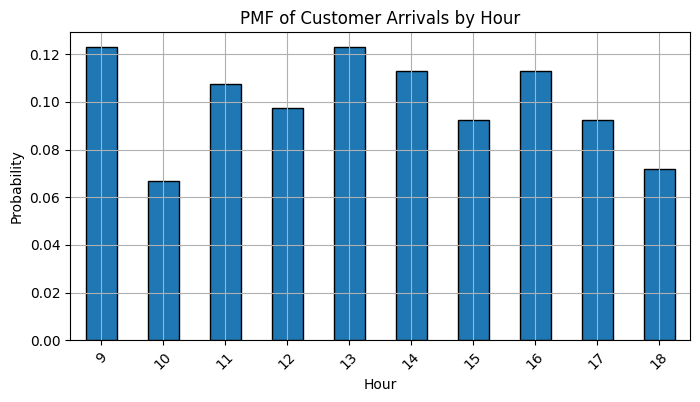

In [20]:
plt.figure(figsize=(8,4))
hourly_PMF.plot(kind='bar', edgecolor='black')
plt.xlabel('Hour')
plt.ylabel('Probability')
plt.title('PMF of Customer Arrivals by Hour')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
